In [1]:
import Pkg

Pkg.add("HomotopyContinuation")
Pkg.add("Plots")
Pkg.add("PyPlot")
Pkg.add("DataFrames")
Pkg.add("CSV")
Pkg.add("SymPy")
Pkg.add("JSON")
Pkg.add("HTTP")

    Updating registry at `~/.julia/registries/General`
    Updating git-repo `https://github.com/JuliaRegistries/General.git`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.7/Project.toml`
  No Changes to `~/.julia/environments/v1.7/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.7/Project.toml`
  No Changes to `~/.julia/environments/v1.7/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.7/Project.toml`
  No Changes to `~/.julia/environments/v1.7/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.7/Project.toml`
  No Changes to `~/.julia/environments/v1.7/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.7/Project.toml`
  No Changes to `~/.julia/environments/v1.7/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.7/Project.toml`
  No Changes to `~/.julia/environ

In [2]:
using HomotopyContinuation
using Plots
using DelimitedFiles
using DataFrames
using CSV
using SymPy
using JSON
using HTTP

In [3]:
function get_roots(f)
    @var y
    roots = []
    # define the polynomials
    F = System([f])
    result = HomotopyContinuation.solve(F)
    for root in results(result)
        push!(roots, root.solution[1])
    end
    return roots
end

@var m
get_roots(m^2 + 1/2)

2-element Vector{Any}:
  -9.4039548065783e-38 - 0.7071067811865475im
 3.851859888774472e-34 + 0.7071067811865475im

In [4]:
# b_string = JSON.parsefile("lmfdbOutput.json")["map"]

# b_string = "1/2/(x^3-3/4*x+1/4)"
# b_string = "((x^(20) + 228*x^(15) + 494*x^(10) - 228*x^5 + 1)^3 ) / (1728 * x^5 * (x^(10) - 11*x^5 - 1)^5 )"
# b_string = "1/128/(x^9-9/4*x^7+27/16*x^5-15/32*x^3+9/256*x+1/256"
# b_string = "-2/9/(x^5-10/3*x^4+95/18*x^3-25/6*x^2+25/16*x-2/9)"
# b_string = "(531441/14641*x^9-13817466/14641*x^8+119751372/14641*x^7-345948408/14641*x^6)/(x^9-11466/121*x^8+49615020/14641*x^7-811853016/14641*x^6+5557399380/14641*x^5-3983231304/14641*x^4-106112569056/14641*x^3+253002020544/14641*x^2+469860895296/14641*x-1357375919744/14641)"
# b_string = "(177147/4330747*x^9+12341241/4330747*x^8+326855898/4330747*x^7+4050170910/4330747*x^6+23085974187/4330747*x^5+48737056617/4330747*x^4)/(x^9+3249/163*x^8+4048254/26569*x^7+2964034542/4330747*x^6+11649133548/4330747*x^5+35210127780/4330747*x^4+72544748502/4330747*x^3+176986604322/4330747*x^2+152852067369/4330747*x+322687697779/4330747)"
# b_string = "-1/(x^5-1)"
# b_string = "27/16*x^4/(x^8+4*x^7+4*x^6+1/2*x^5+31/32*x^4-1/16*x^3+1/16*x^2-1/128*x+1/4096)"

# b_string = data["map"]
# b_sym = (sympify(b_string))
# denominator =  eval(convert(Expr, denom(b_sym)))
# # numerator = eval(convert(Expr, numer(b_sym)))
# b_sym
# typeof(eval(convert(Expr, denom(b_sym))))

In [27]:
h = 0.0001
# n=5
num = 15

name = "7T6-3.2.2_3.3.1_3.3.1-a"
url = string("https://beta.lmfdb.org/Belyi/download_galmap_to_text/", name)
r = String(HTTP.request("GET", url).body)
brace_1 = findfirst("{", r)
brace_2 = findfirst("}", r)
data_string = r[brace_1[1]:brace_2[1]]
data = JSON.parse(data_string)

@var x

b_string = data["map"]
# b_string = "-1/(x^5-1)"
b_sym = simplify(sympify(b_string))

n = eval(convert(Expr, numer(b_sym)))
d = eval(convert(Expr, denom(b_sym)))
belyi = b_sym

body = convert(Expr, belyi)
syms = Symbol.(free_symbols(belyi))
bt = eval(Expr(:function, Expr(:call, gensym(), syms...), body))

ex = diff(belyi)
bodydiff = convert(Expr, ex)
symsdiff = Symbol.(free_symbols(ex))
dt = eval(Expr(:function, Expr(:call, gensym(), syms...), bodydiff))
belyi

                 3 ⎛      4         2       ⎞                 
                x ⋅⎝1458⋅x  - 3024⋅x  + 1568⎠                 
──────────────────────────────────────────────────────────────
     7         6         5         4        3         2       
729⋅x  + 1701⋅x  - 1512⋅x  - 5012⋅x  + 784⋅x  + 5040⋅x  - 1728

In [28]:
# function dist((a1, b1, c1), (a2, b2, c2))
#     distance = sqrt((a1-a2)^2 + (b1 - b2)^2 + (c1- c2)^2)
#     # if isnan(distance)
#     #     println("THE VALUE WAS NAN", a1, a2, b1, b2, c1, c2)
#     # end
#     return distance
# end
function stereographic(c)
    # println(typeof(c))
    x = (2 * real(c)) / (abs(c) ^ 2 + 1)
    y = (2 * imag(c)) / (abs(c) ^ 2 + 1)
    z = (abs(c)^2 - 1) / (abs(c)^2 + 1)
    if isnan(x)
        println("THE VALUE WAS NAN: ", c)
    end
    return (x, y, z)
end

stereographic (generic function with 1 method)

In [29]:
function rk4(start, stop, initialQ, initialE, i)
    points = []
    qs = []
    rs = []
    q = initialQ
    e = initialE
    push!(points, e)

    while q < 1
        # nexth = abs(dt(e)) * h
        nexth = 1/2 * abs(dt(e)) *(1 + abs(e)^2) * h 
        nextq = q + nexth
        
        
        k1 = nexth * (1/dt(e))
        k2 = nexth * (1/dt(e + k1/2))
        k3 = nexth * (1/dt(e + k2/2))
        k4 = nexth * (1/dt(e + k3))
        
        nexte = e + (1/6) * (k1 + 2*k2 + 2*k3 + k4)
        if i==0
            push!(qs, q)
            push!(rs, real(nexte))
        end
        push!(points, nexte)
        q = nextq

        
        # e = newtons(nexte, nextq, 10)
        e = nexte
    end
    q = initialQ
    e = initialE
    
    while q > 0
        # nexth = abs(dt(e)) * h
        nexth = 1/2 * abs(dt(e)) *(1 + abs(e)^2) * h 
        nextq = q - nexth

        k1 = nexth * (1/dt(e))
        k2 = nexth * (1/dt(e - k1/2))
        k3 = nexth * (1/dt(e - k2/2))
        k4 = nexth * (1/dt(e - k3))
        
        nexte = e - (1/6) * (k1 + 2*k2 + 2*k3 + k4)
        if i==0
            prepend!(qs, q)
            prepend!(rs, real(nexte))
        end
        if isnan(nexte)
            println("NEXT E NAN: ", e)
        end
        
        push!(points, nexte)
        q = nextq
        e = nexte
        # e = newtons(nexte, nextq, 10)
        
    end
    return points, qs, rs
end

@var x
points = []

println(typeof(d))
roots = get_roots(n - 1/2 * d)
println("ROOTS FOUND: $(length(roots))")
i = 0
rs = []
qs = []
for root in roots
    edge = rk4(0, 1, 0.5, root, i)
    points = vcat(points, edge[1])
    qs = vcat(qs, edge[2])
    rs =vcat(rs, edge[3])
    i+=1 
end

Tracking 7 paths... 100%|███████████████████████████████| Time: 0:00:03
  # paths tracked:                  7
  # non-singular solutions (real):  7 (3)
  # singular endpoints (real):      0 (0)
  # total solutions (real):         7 (3)
ROOTS FOUND: 7


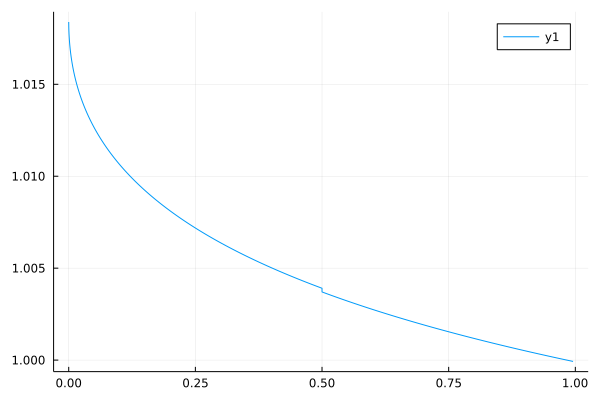

In [30]:
sampling = 1

length(qs[1:sampling:length(qs)])
plot(qs[1:sampling:length(qs)], rs[1:sampling:length(rs)])

In [31]:

xs = []
ys = []
zs = []
for point in points
    x, y, z = stereographic(point)
    x = round(x, digits=3)
    y = round(y, digits=3)
    z = round(z, digits=3)
    push!(xs, x)
    push!(ys, y)
    push!(zs, z)
end

# df = DataFrame(X=xs, Y=ys, Z=zs)
# CSV.write("test.csv", df)

# scatter(xs[1:1000:length(xs)], ys[1:1000:length(xs)], zs[1:1000:length(xs)])


In [32]:
sampling = 1
l = length(xs)/sampling
io = open("juliaPCD.pcd", "w"); 
write(io,
"
# .PCD v0.7 - Point Cloud Data file format
VERSION 0.7
FIELDS x y z
SIZE 4 4 4
TYPE F F F
COUNT 1 1 1
WIDTH $(length(xs)/sampling)
HEIGHT 1
VIEWPOINT 0 0 0 1 0 0 0
POINTS $(length(xs)/sampling)
DATA ascii\n
")
    for i in 1:sampling:(length(xs))
        write(io, "$(xs[i]) $(ys[i]) $(zs[i])\n")
    end

close(io);


In [33]:
length(xs)

70211